In [1]:
# Importing Libraries & Files
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.metrics import precision_score, recall_score, precision_recall_curve
from sklearn import metrics
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Reading the data file using pandas
Lead_data = pd.read_csv("Leads.csv")

Lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
Lead_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [5]:
Lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
Lead_data.shape

(9240, 37)

In [7]:
# check for duplicate 
Lead_data.duplicated(subset = ['Prospect ID'], keep = False).sum()

0

In [8]:
Lead_data.duplicated(subset = ['Lead Number'], keep = False).sum()

0

No duplicate found in Prospect ID and Lead Number

These are ID related columns with unique values which can be dropped.

## EXPLORATORY DATA ANALYSIS
### Data Cleaning & Treatment:

In [11]:
#dropping Lead Number and Prospect ID since they have all unique values

Lead_data.drop(['Prospect ID', 'Lead Number'], axis = 1, inplace = True)

In [12]:
#Converting 'Select' values to NaN.

Lead_data = Lead_data.replace('Select', np.nan)

In [13]:
Lead_data.nunique()

Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
How did you hear about X Education                  9
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article                                   2
X Education Forums                                  2
Newspaper                   

In [14]:
# Dropping unique valued columns
Lead_data= Lead_data.drop(['Magazine','Receive More Updates About Our Courses','I agree to pay the amount through cheque','Get updates on DM Content','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque'],axis=1) 

In [15]:
#checking null values in each rows

Lead_data.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                                           0
Digital Advertisement       

In [16]:
# % of null value
round(100*(Lead_data.isnull().sum())/len(Lead_data.index),2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

In [17]:
#dropping columns with more than 45% missing values

Lead_data = Lead_data.drop(['Asymmetrique Profile Score','Asymmetrique Activity Score','Asymmetrique Profile Index','Asymmetrique Activity Index','Lead Quality','Lead Profile','How did you hear about X Education'],axis=1) 

In [18]:
Lead_data.shape

(9240, 23)

In [19]:
#checking null values percentage

round(100*(Lead_data.isnull().sum()/len(Lead_data.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Advertisement                             0.00
Through Re

We can see many columns with null values but few of them may be important, so will be convert null values to 'not provided'. Once model is defined it can find out and keep importnat columns and we can remove un-necessary columns.

In [21]:
Lead_data['Specialization'] = Lead_data['Specialization'].fillna('not provided')
Lead_data['City'] = Lead_data['City'].fillna('not provided')
Lead_data['Tags'] = Lead_data['Tags'].fillna('not provided')
Lead_data['What matters most to you in choosing a course'] = Lead_data['What matters most to you in choosing a course'].fillna('not provided')
Lead_data['What is your current occupation'] = Lead_data['What is your current occupation'].fillna('not provided')
Lead_data['Country'] = Lead_data['Country'].fillna('not provided')
Lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 23 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Country                                        9240 

In [22]:
len(Lead_data.index)

9240

In [23]:
#checking null values percentage

round(100*(Lead_data.isnull().sum()/len(Lead_data.index)), 2)

Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement                            0.00
Through Recommendations     

In [24]:
Lead_data.shape

(9240, 23)

### Categorical Attributes Analysis:

In [26]:
Lead_data['Country'].value_counts()

Country
India                   6492
not provided            2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switze

In [27]:
def slots(x):
    category = ""
    if x == "India":
        category = "India"
    elif x == "not provided":
        category = "not provided"
    else:
        category = "outside india"
    return category

Lead_data['Country'] = Lead_data.apply(lambda x:slots(x['Country']), axis = 1)
Lead_data['Country'].value_counts()

Country
India            6492
not provided     2461
outside india     287
Name: count, dtype: int64

In [28]:
# Since India is the most common occurence among the non-missing values we can impute all not provided values with India

Lead_data['Country'] = Lead_data['Country'].replace('not provided','India')
Lead_data['Country'].value_counts()

Country
India            8953
outside india     287
Name: count, dtype: int64

In [29]:
# Checking the percent of lose if the null values are removed
round(100*(sum(Lead_data.isnull().sum(axis=1) > 1)/Lead_data.shape[0]),2)

1.48

In [30]:
Lead_data = Lead_data[Lead_data.isnull().sum(axis=1) <1]

In [31]:
# Rechecking the percentage of missing values
round(100*(Lead_data.isnull().sum()/len(Lead_data.index)), 2)

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                            0.0
Through Recommendations                       

In [32]:
Lead_data.shape

(9074, 23)

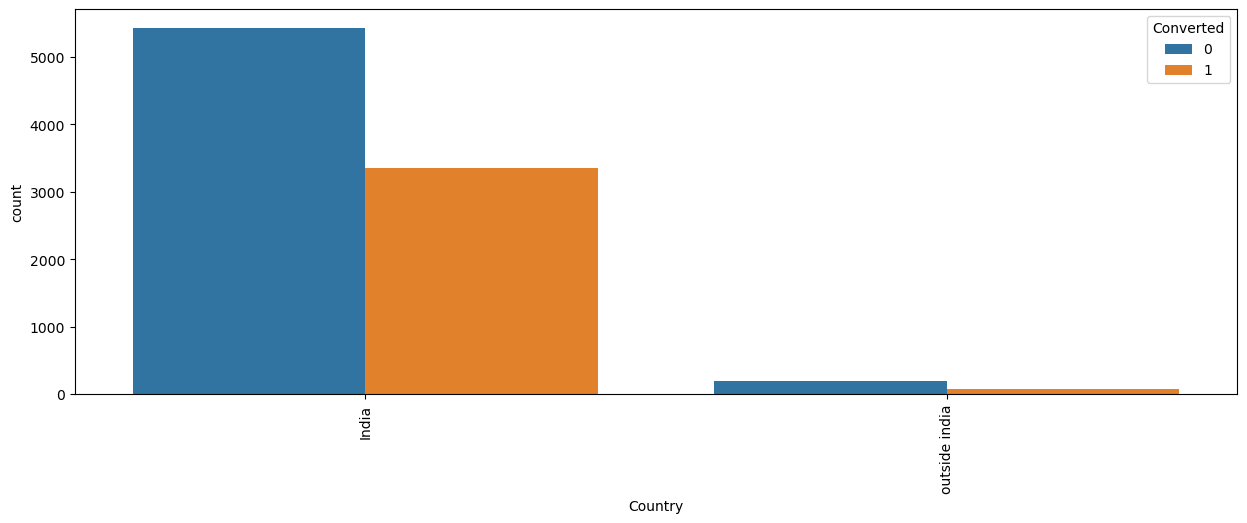

In [33]:
#plotting spread of Country

plt.figure(figsize=(15,5))
s1 = sns.countplot(data=Lead_data, x='Country', hue='Converted')
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

As we can see the Number of Values for India are quite high (almost 97% of the Data), this column can be dropped

In [35]:
#creating a list of columns to be droppped

cols_to_drop=['Country']

In [36]:
#checking value counts of "City" column

Lead_data['City'].value_counts(dropna=False)

City
not provided                   3575
Mumbai                         3177
Thane & Outskirts               745
Other Cities                    680
Other Cities of Maharashtra     446
Other Metro Cities              377
Tier II Cities                   74
Name: count, dtype: int64

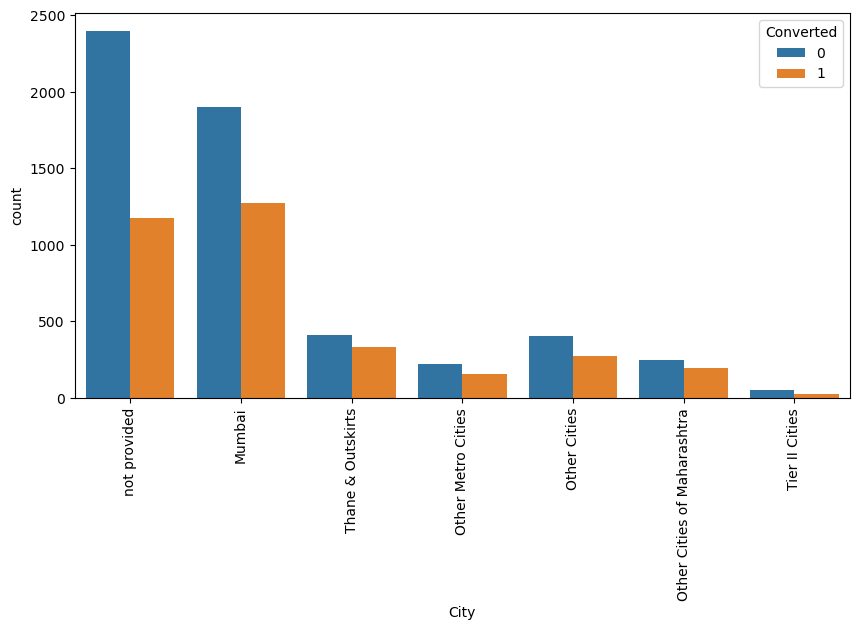

In [37]:
#plot the spread of City columnn

plt.figure(figsize=(10,5))
s1 = sns.countplot(data=Lead_data, x='City', hue='Converted')
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

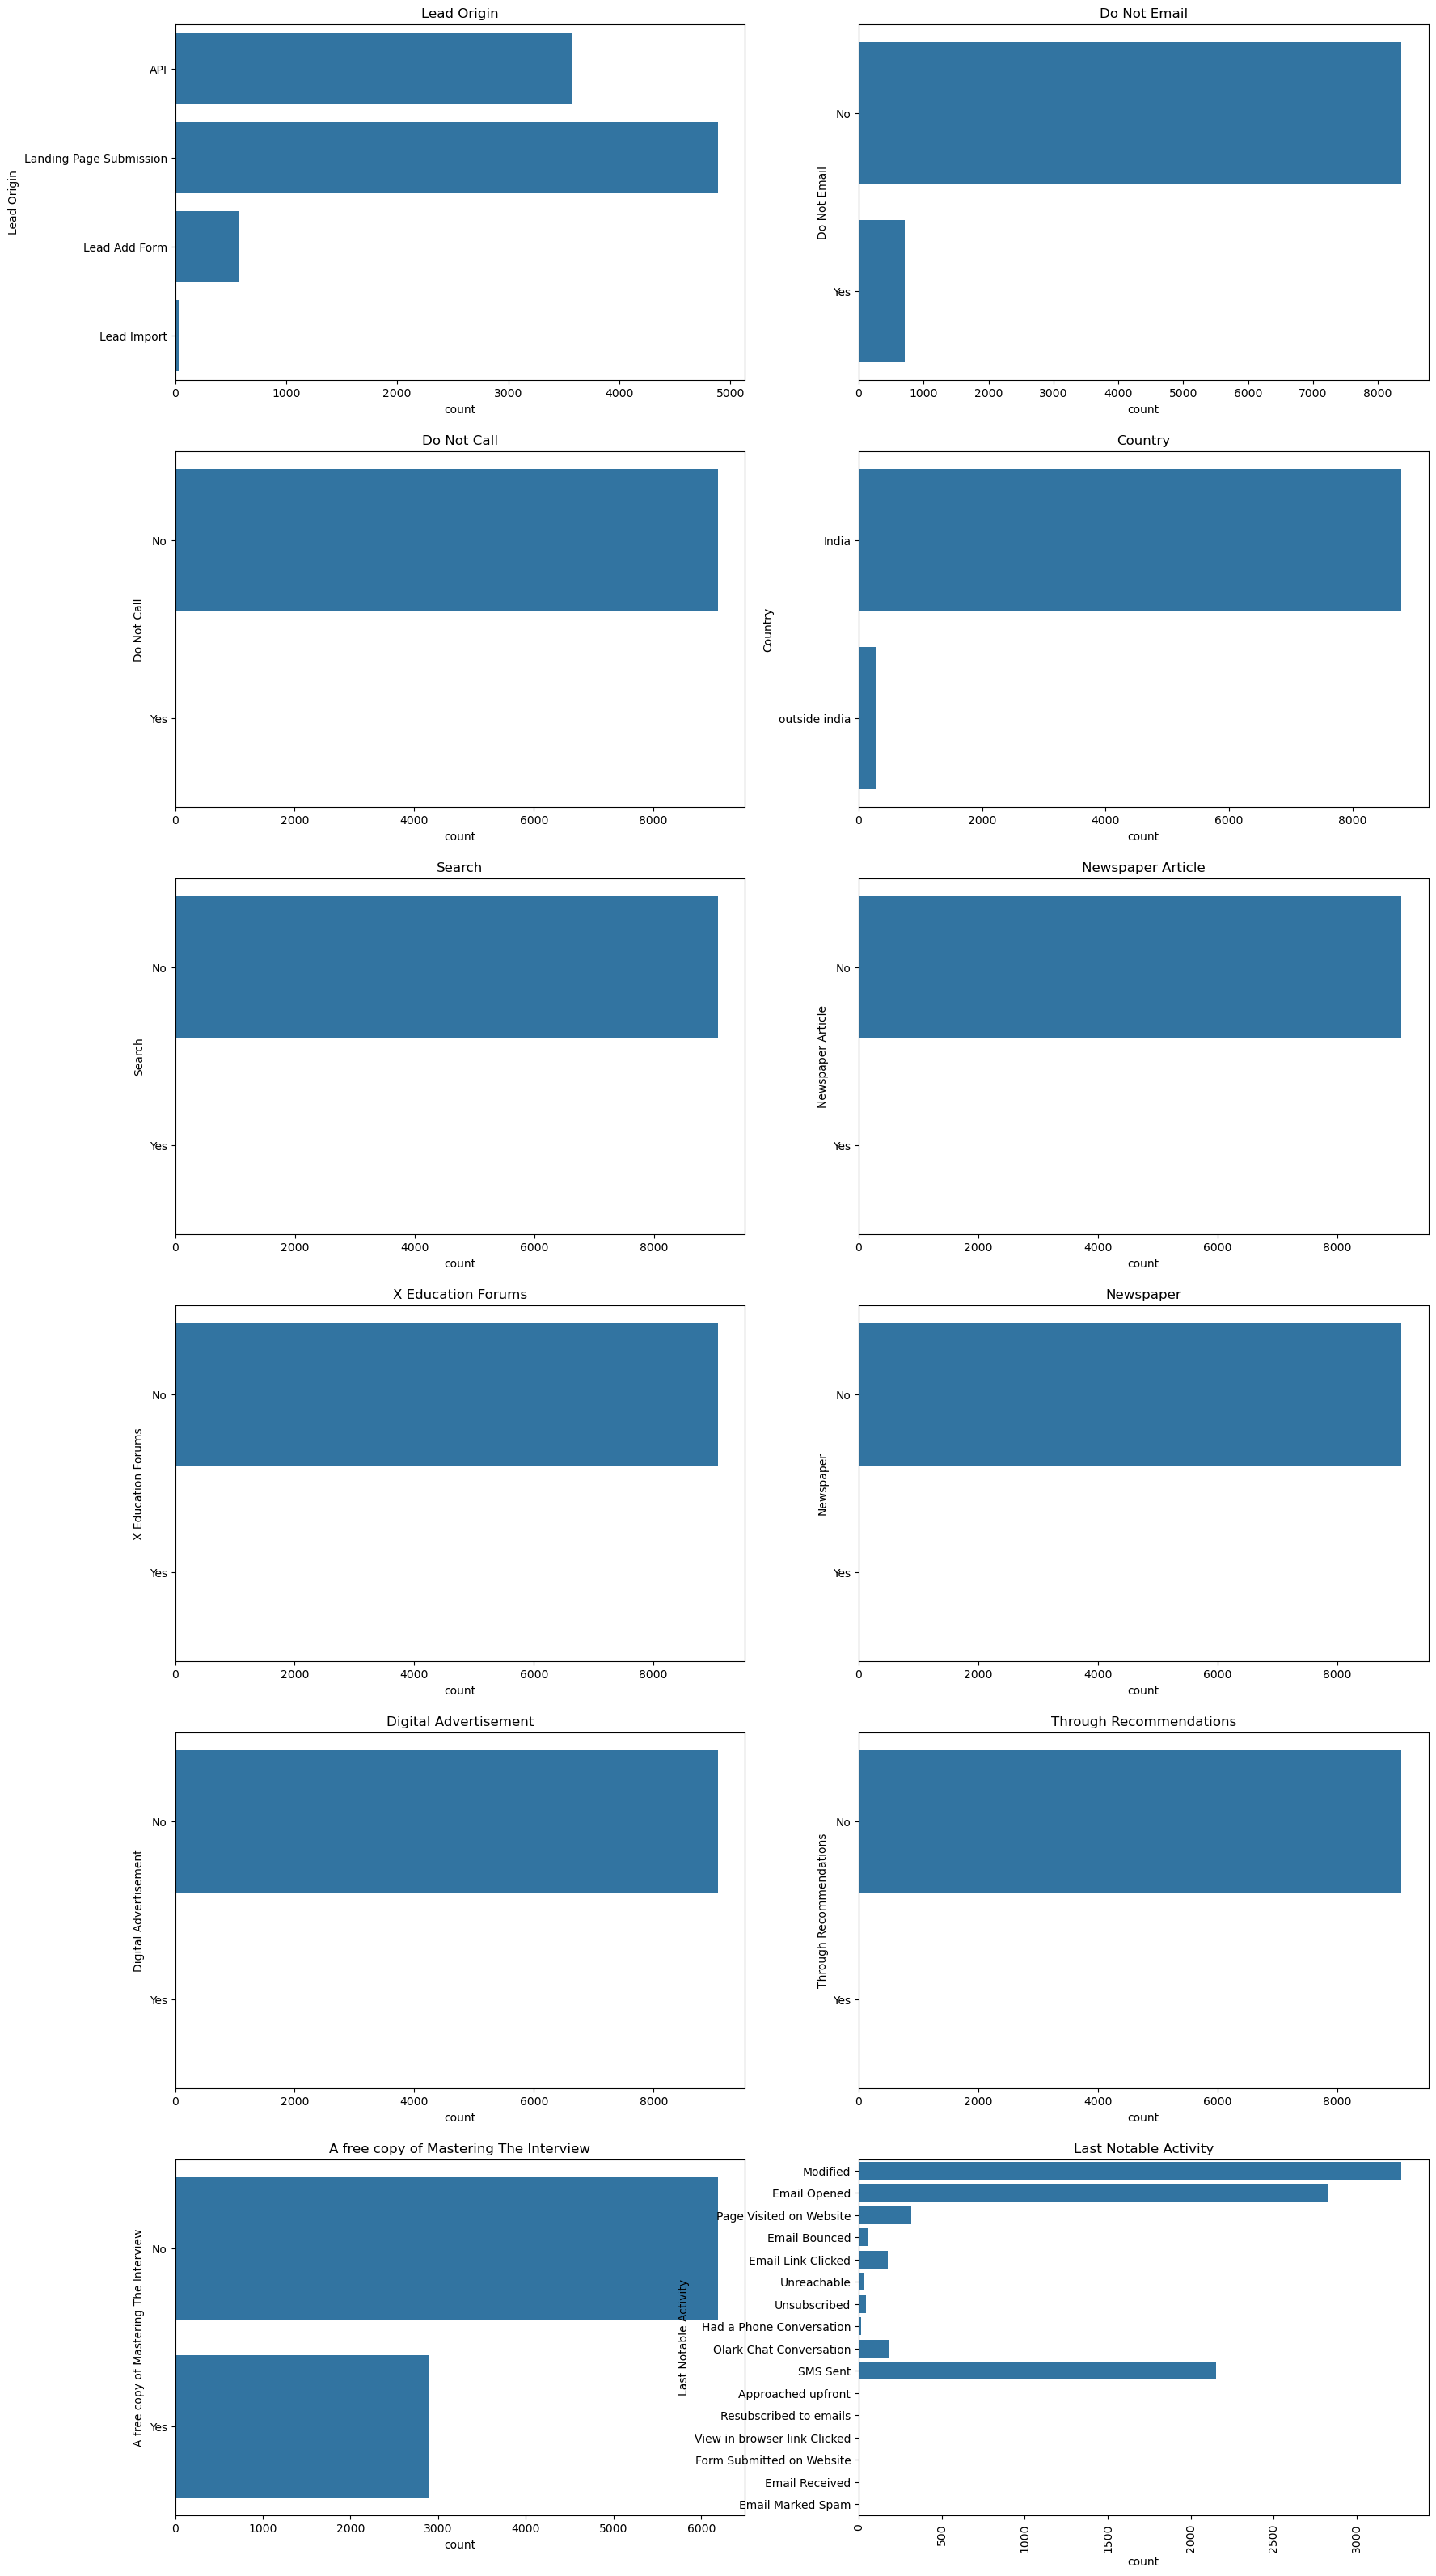

In [38]:
plt.figure(figsize = (20,40))

plt.subplot(6,2,1)
sns.countplot(Lead_data['Lead Origin'])
plt.title('Lead Origin')

plt.subplot(6,2,2)
sns.countplot(Lead_data['Do Not Email'])
plt.title('Do Not Email')

plt.subplot(6,2,3)
sns.countplot(Lead_data['Do Not Call'])
plt.title('Do Not Call')

plt.subplot(6,2,4)
sns.countplot(Lead_data['Country'])
plt.title('Country')

plt.subplot(6,2,5)
sns.countplot(Lead_data['Search'])
plt.title('Search')
plt.subplot(6,2,6)
sns.countplot(Lead_data['Newspaper Article'])
plt.title('Newspaper Article')

plt.subplot(6,2,7)
sns.countplot(Lead_data['X Education Forums'])
plt.title('X Education Forums')

plt.subplot(6,2,8)
sns.countplot(Lead_data['Newspaper'])
plt.title('Newspaper')

plt.subplot(6,2,9)
sns.countplot(Lead_data['Digital Advertisement'])
plt.title('Digital Advertisement')

plt.subplot(6,2,10)
sns.countplot(Lead_data['Through Recommendations'])
plt.title('Through Recommendations')

plt.subplot(6,2,11)
sns.countplot(Lead_data['A free copy of Mastering The Interview'])
plt.title('A free copy of Mastering The Interview')
plt.subplot(6,2,12)
sns.countplot(Lead_data['Last Notable Activity']).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')


plt.show()


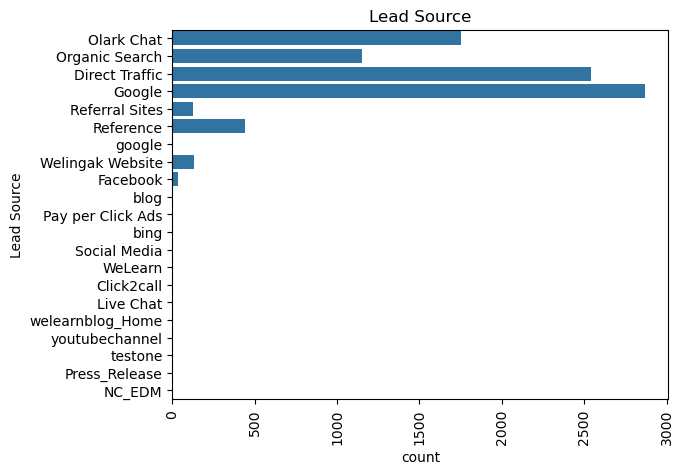

In [39]:
sns.countplot(Lead_data['Lead Source']).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')
plt.show()

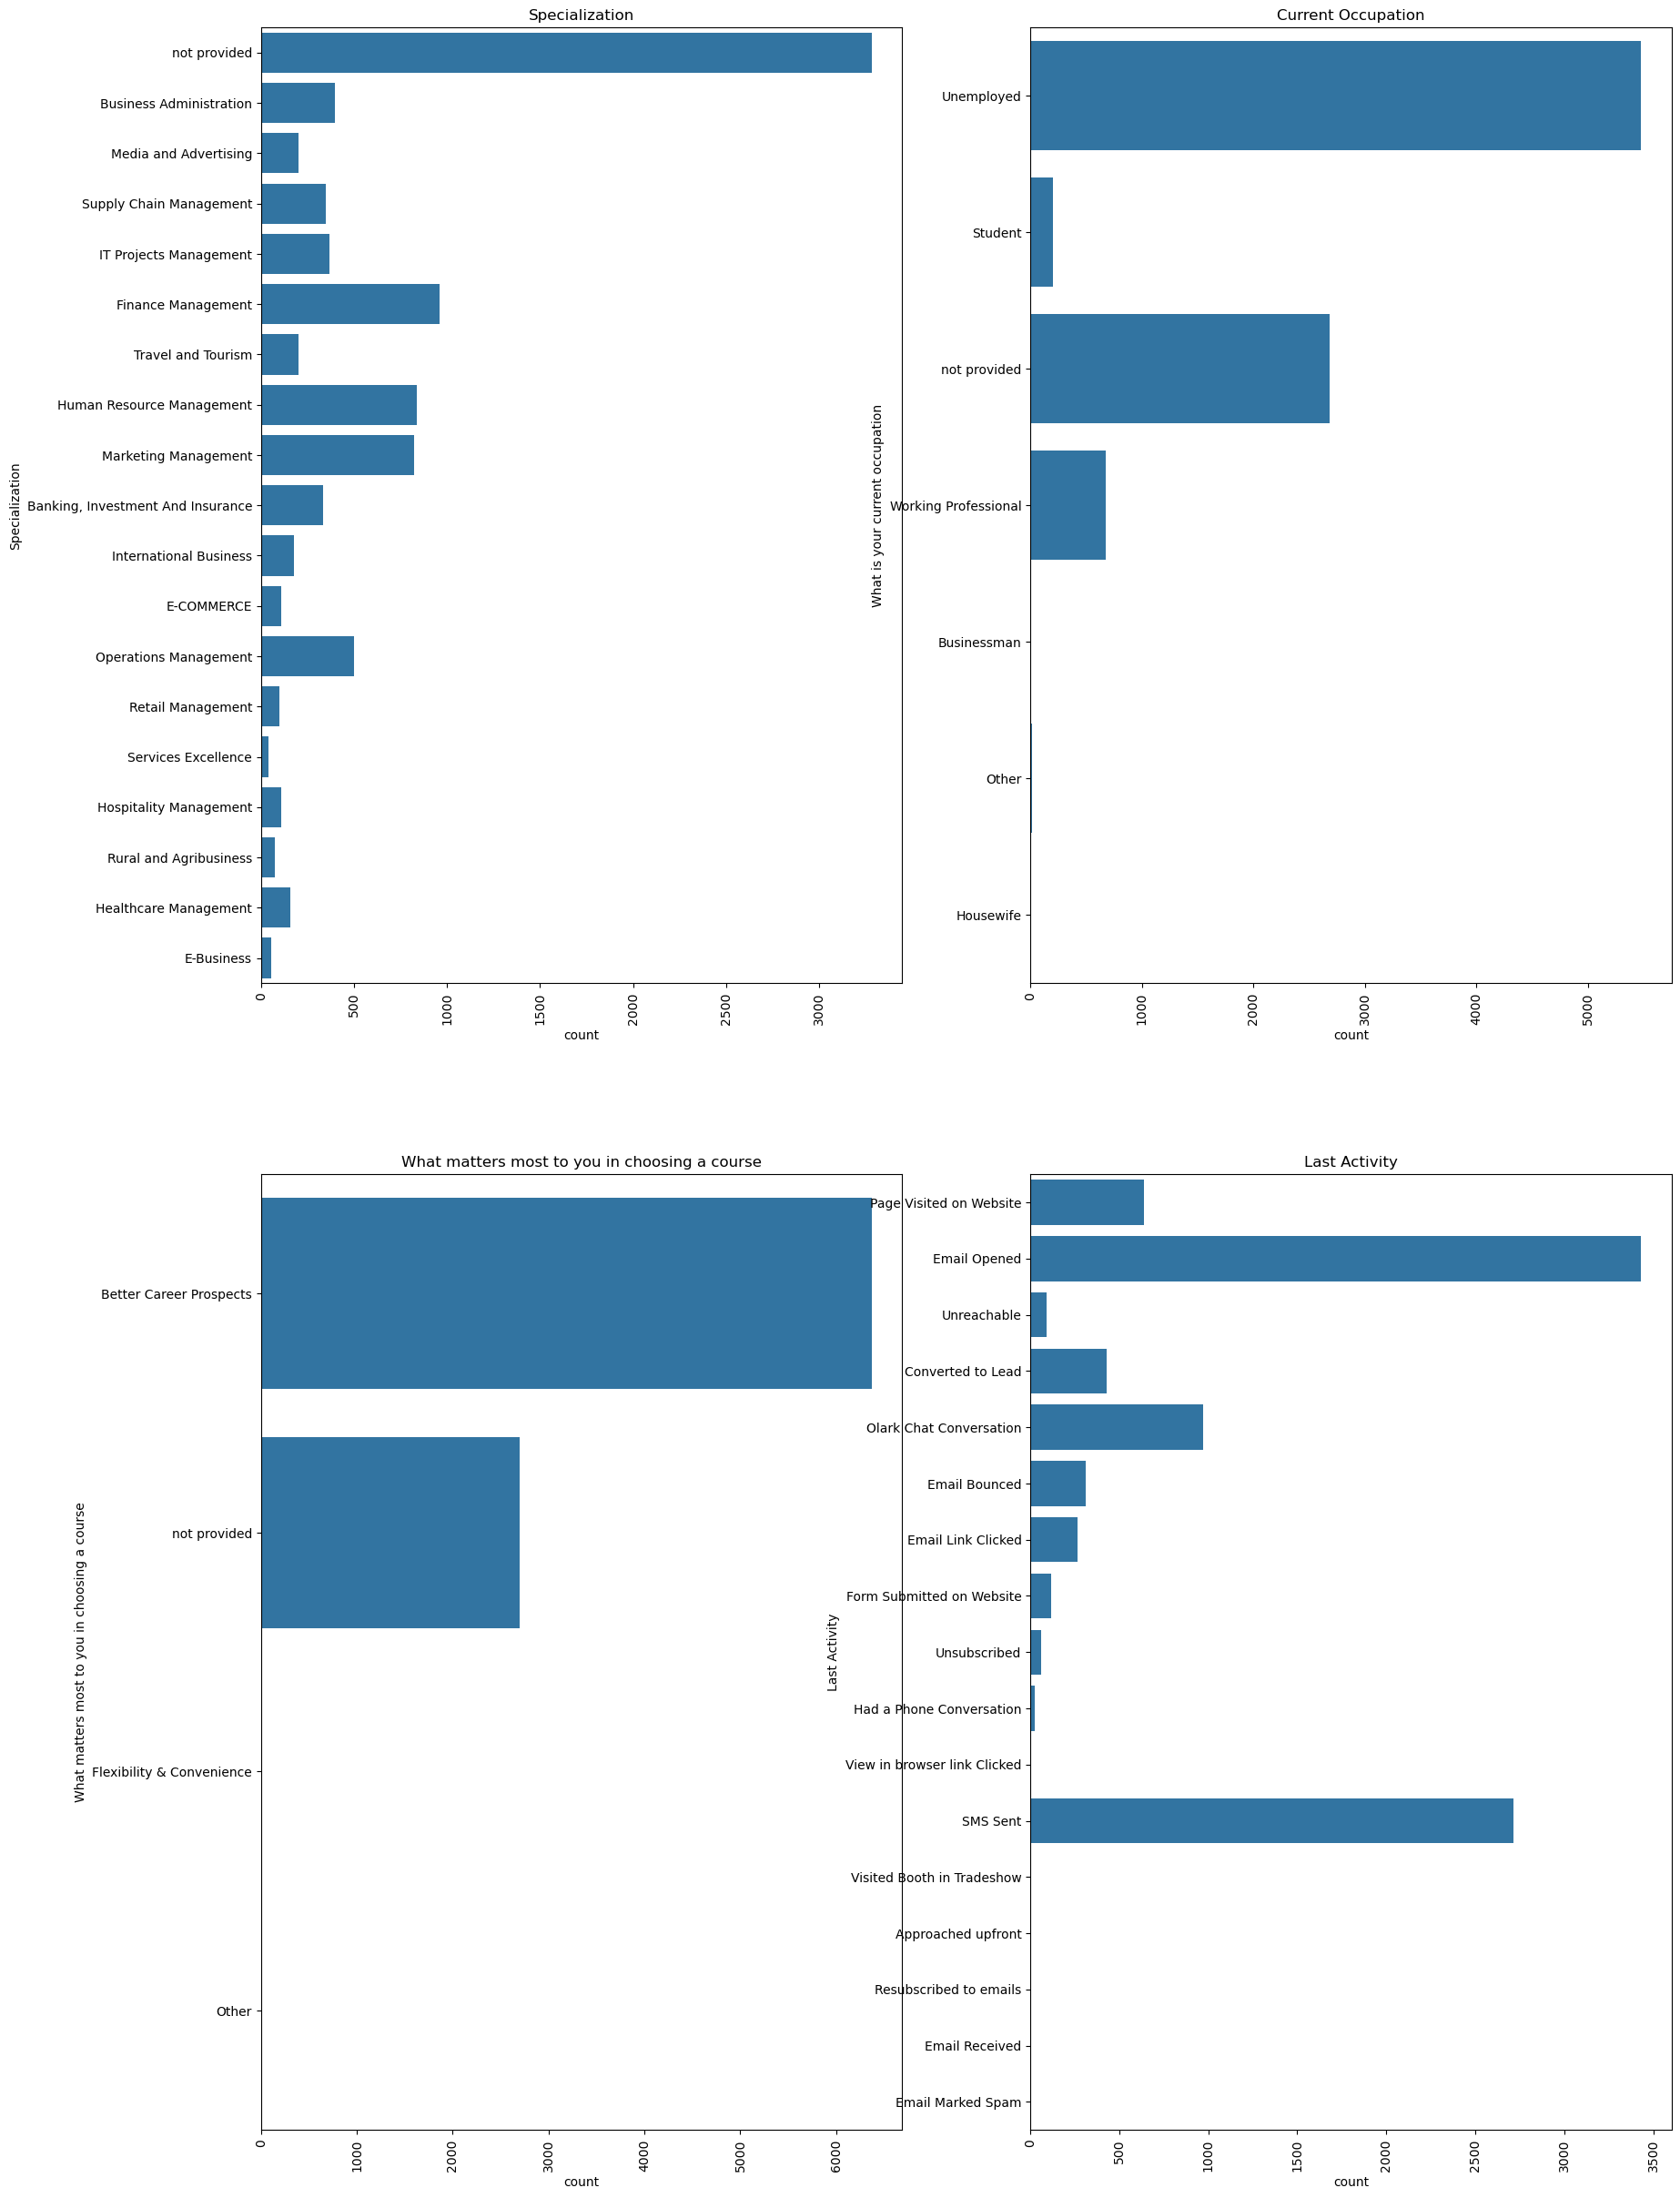

In [40]:
plt.figure(figsize = (20,30))
plt.subplot(2,2,1)
sns.countplot(Lead_data['Specialization']).tick_params(axis='x', rotation = 90)
plt.title('Specialization')
plt.subplot(2,2,2)
sns.countplot(Lead_data['What is your current occupation']).tick_params(axis='x', rotation = 90)
plt.title('Current Occupation')
plt.subplot(2,2,3)
sns.countplot(Lead_data['What matters most to you in choosing a course']).tick_params(axis='x', rotation = 90)
plt.title('What matters most to you in choosing a course')
plt.subplot(2,2,4)
sns.countplot(Lead_data['Last Activity']).tick_params(axis='x', rotation = 90)
plt.title('Last Activity')
plt.show()


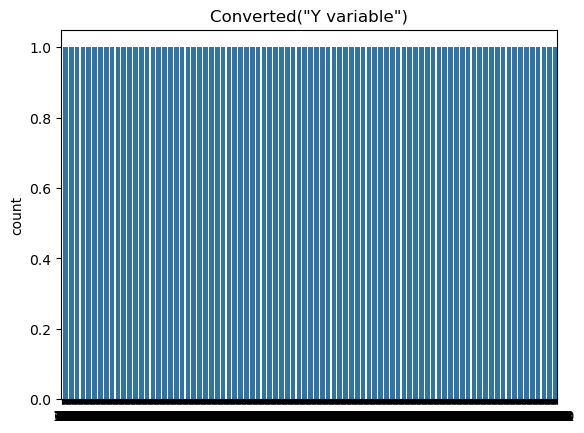

In [41]:
sns.countplot(Lead_data['Converted'].sample(frac=0.1))
plt.title('Converted("Y variable")')
plt.show()

### Numerical Variables

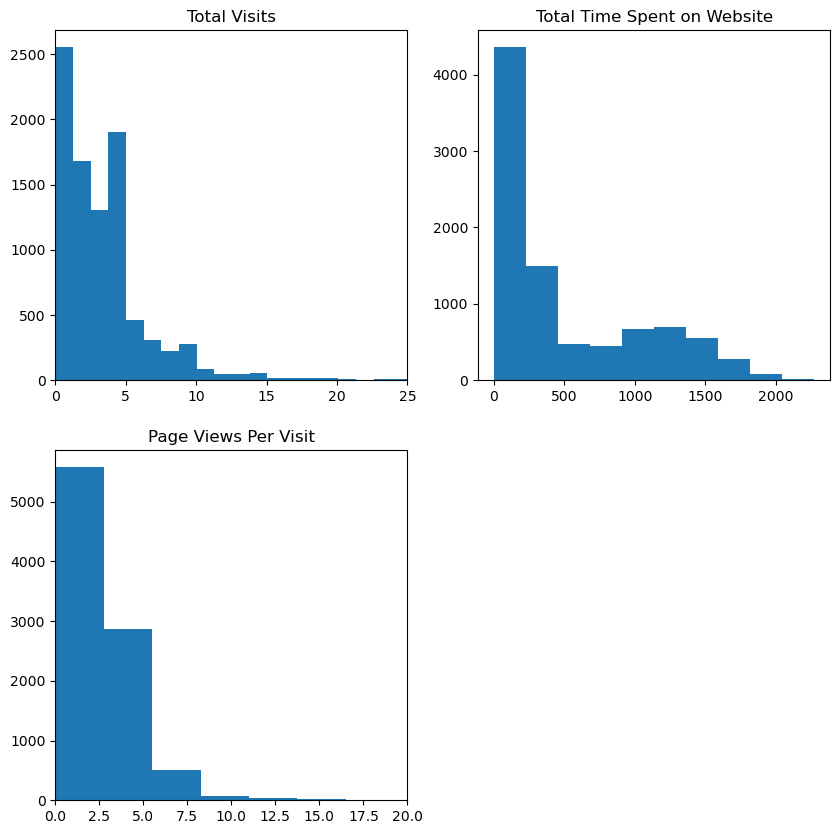

In [43]:
plt.figure(figsize = (10,10))
plt.subplot(221)
plt.hist(Lead_data['TotalVisits'], bins = 200)
plt.title('Total Visits')
plt.xlim(0,25)

plt.subplot(222)
plt.hist(Lead_data['Total Time Spent on Website'], bins = 10)
plt.title('Total Time Spent on Website')

plt.subplot(223)
plt.hist(Lead_data['Page Views Per Visit'], bins = 20)
plt.title('Page Views Per Visit')
plt.xlim(0,20)
plt.show( )         


### Relating all the categorical variables to Converted

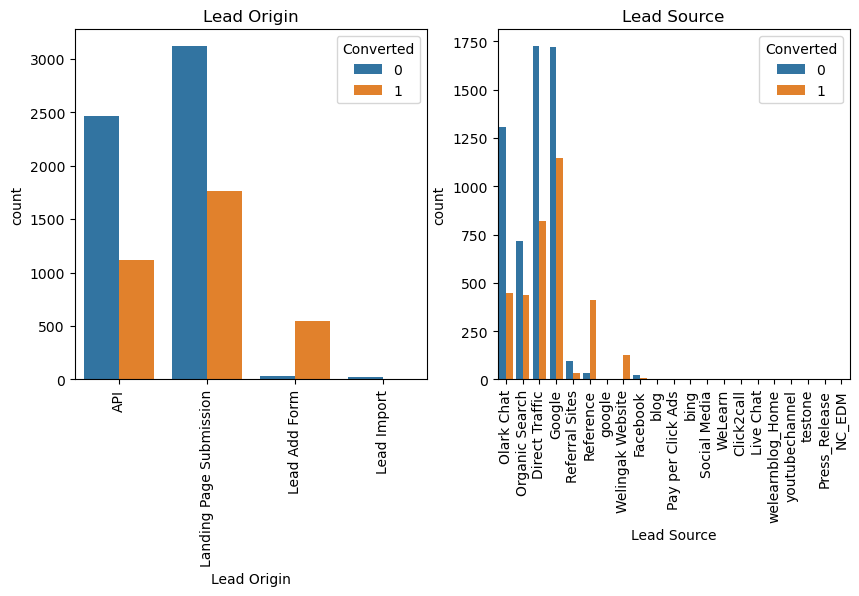

In [45]:
plt.figure(figsize = (10,10))

plt.subplot(2,2,1)
sns.countplot(x='Lead Origin', hue='Converted', data= Lead_data).tick_params(axis='x', rotation = 90)
plt.title('Lead Origin')

plt.subplot(2,2,2)
sns.countplot(x='Lead Source', hue='Converted', data= Lead_data).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')
plt.show()


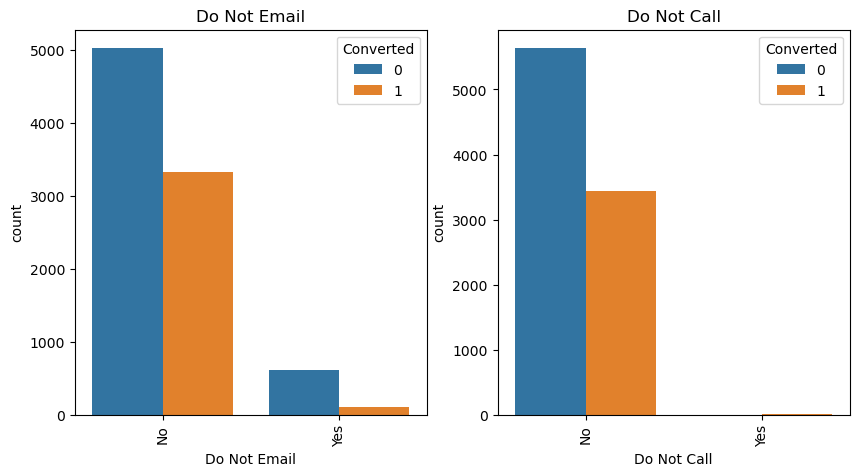

In [46]:
plt.figure(figsize=(10 ,5))
plt.subplot(1,2,1)
sns.countplot(x='Do Not Email', hue='Converted', data= Lead_data).tick_params(axis='x', rotation = 90)
plt.title('Do Not Email')

plt.subplot(1,2,2)
sns.countplot(x='Do Not Call', hue='Converted', data= Lead_data).tick_params(axis='x', rotation = 90)
plt.title('Do Not Call')
plt.show()


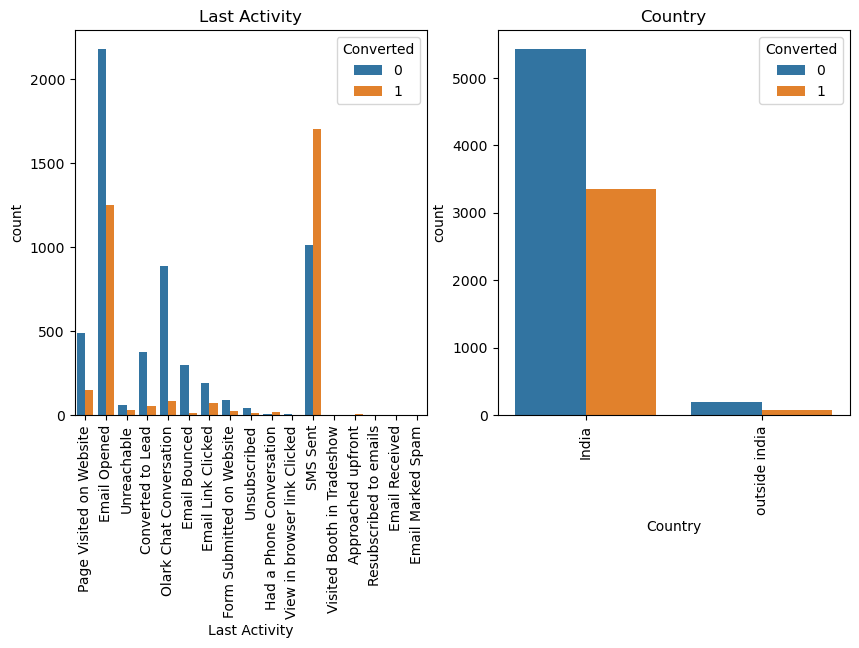

In [47]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Last Activity', hue='Converted', data= Lead_data).tick_params(axis='x', rotation = 90)
plt.title('Last Activity')

plt.subplot(1,2,2)
sns.countplot(x='Country', hue='Converted', data= Lead_data).tick_params(axis='x', rotation = 90)
plt.title('Country')
plt.show()


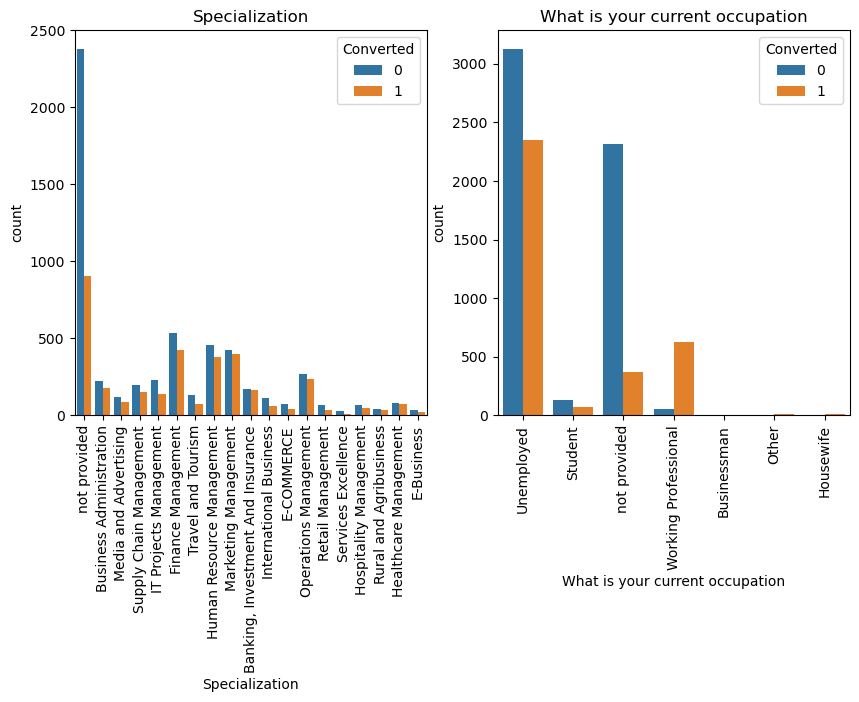

In [48]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Specialization', hue='Converted', data= Lead_data).tick_params(axis='x', rotation = 90)
plt.title('Specialization')

plt.subplot(1,2,2)
sns.countplot(x='What is your current occupation', hue='Converted', data= Lead_data).tick_params(axis='x', rotation = 90)
plt.title('What is your current occupation')
plt.show()

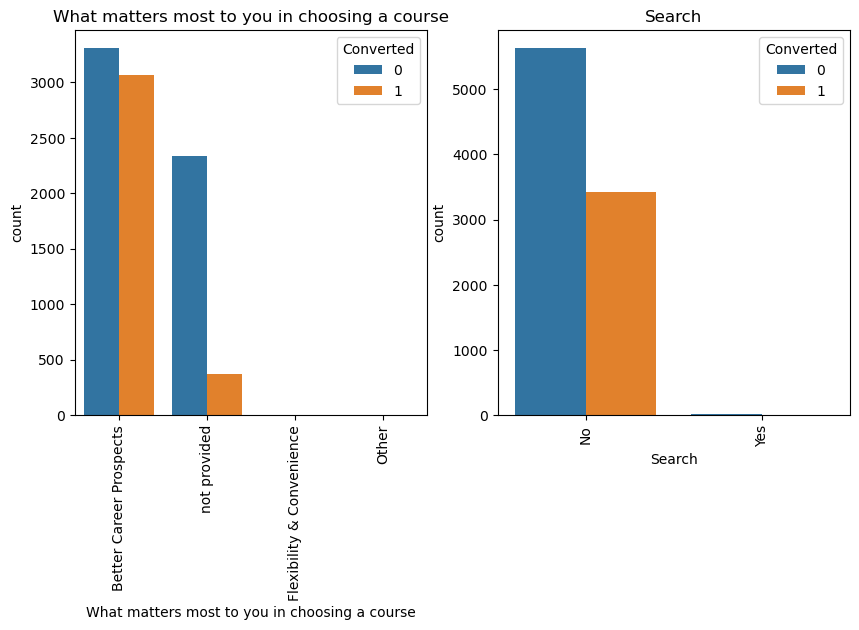

In [49]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='What matters most to you in choosing a course', hue='Converted', data= Lead_data).tick_params(axis='x', rotation = 90)
plt.title('What matters most to you in choosing a course')

plt.subplot(1,2,2)
sns.countplot(x='Search', hue='Converted', data= Lead_data).tick_params(axis='x', rotation = 90)
plt.title('Search')
plt.show()

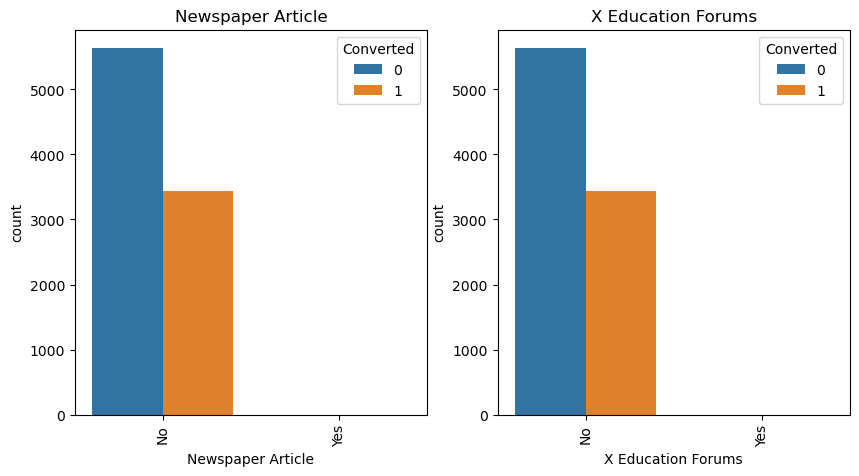

In [50]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Newspaper Article', hue='Converted', data= Lead_data).tick_params(axis='x', rotation = 90)
plt.title('Newspaper Article')

plt.subplot(1,2,2)
sns.countplot(x='X Education Forums', hue='Converted', data= Lead_data).tick_params(axis='x', rotation = 90)
plt.title('X Education Forums')
plt.show()

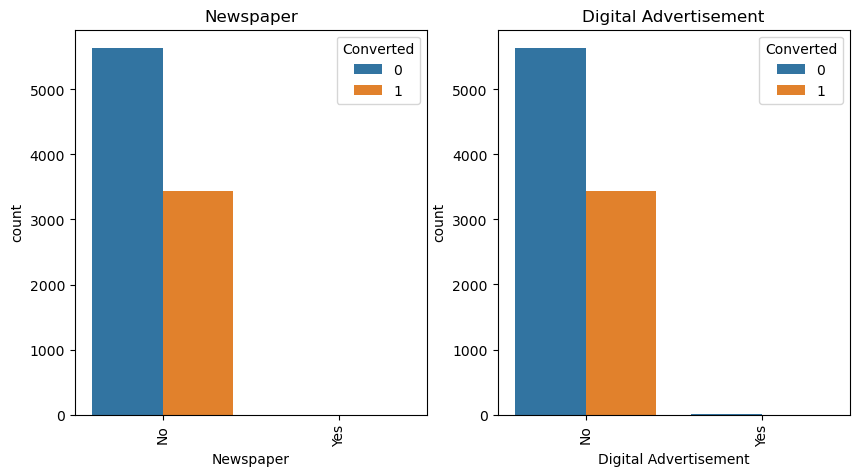

In [51]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Newspaper', hue='Converted', data= Lead_data).tick_params(axis='x', rotation = 90)
plt.title('Newspaper')

plt.subplot(1,2,2)
sns.countplot(x='Digital Advertisement', hue='Converted', data= Lead_data).tick_params(axis='x', rotation = 90)
plt.title('Digital Advertisement')
plt.show()


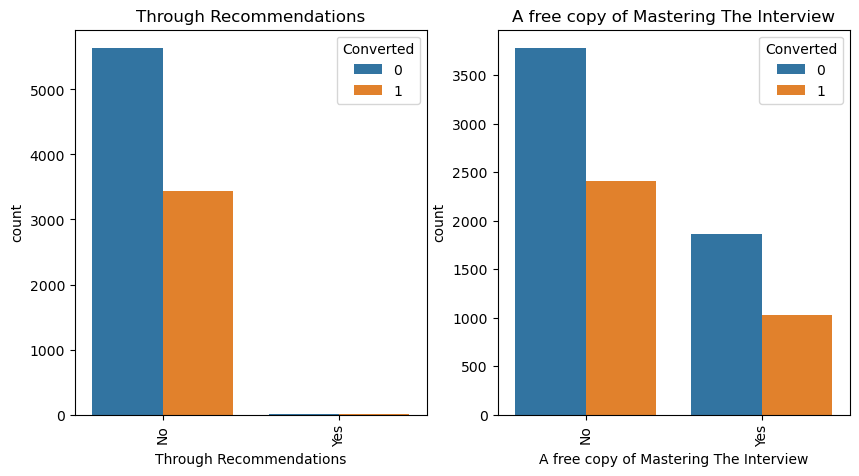

In [52]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Through Recommendations', hue='Converted', data= Lead_data).tick_params(axis='x', rotation = 90)
plt.title('Through Recommendations')

plt.subplot(1,2,2)
sns.countplot(x='A free copy of Mastering The Interview', hue='Converted', data= Lead_data).tick_params(axis='x', rotation = 90)
plt.title('A free copy of Mastering The Interview')
plt.show()

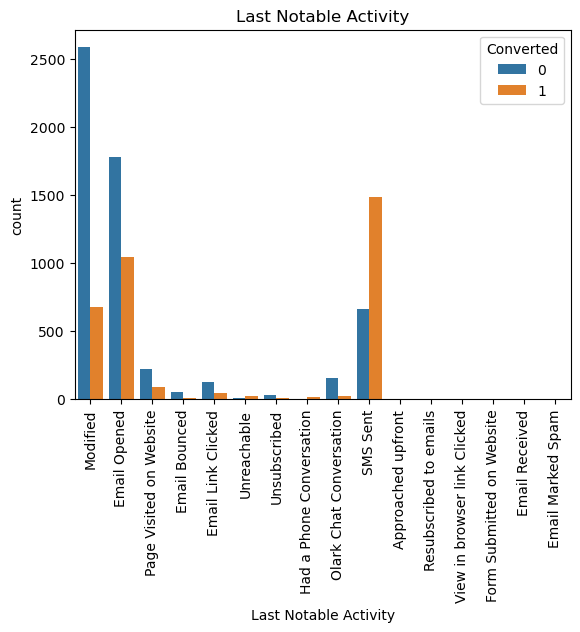

In [53]:
sns.countplot(x='Last Notable Activity', hue='Converted', data= Lead_data).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')
plt.show()

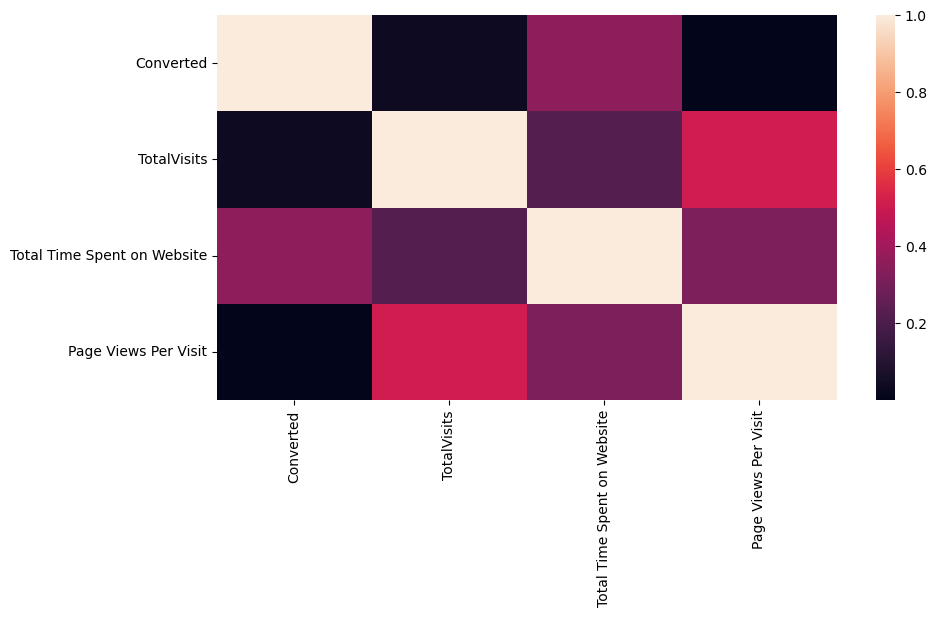

In [54]:
# To check the correlation among varibles
plt.figure(figsize=(10,5))
sns.heatmap(Lead_data.select_dtypes(include=[np.number]).corr())
plt.show()

It can be seen from the above exploratory data analysis that there are many elements that have very little data.
So that may be less relevent for out analysis


In [56]:
### Outlier analysis

In [57]:
numeric = Lead_data[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]
numeric.describe(percentiles=[0.25,0.5,0.75,0.9,0.99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000
mean,3.456028,482.887481,2.370151
std,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000
25%,1.000000,11.000000,1.000000
50%,3.000000,246.000000,2.000000
75%,5.000000,922.750000,3.200000
90%,7.000000,1373.000000,5.000000
99%,17.000000,1839.000000,9.000000
max,251.000000,2272.000000,55.000000


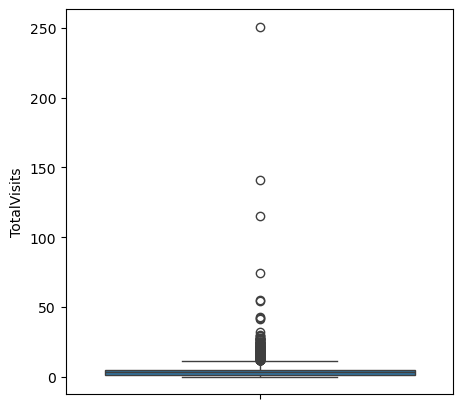

In [58]:
plt.figure(figsize = (5,5))
sns.boxplot(y=Lead_data['TotalVisits'])
plt.show()

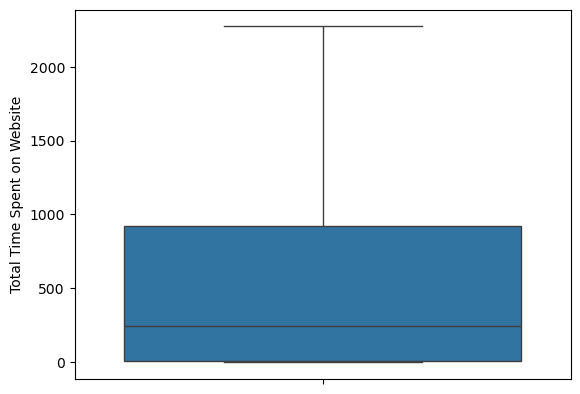

In [59]:
sns.boxplot(y=Lead_data['Total Time Spent on Website'])
plt.show()

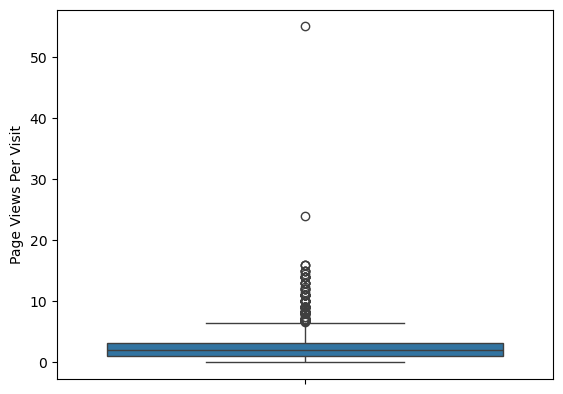

In [60]:
sns.boxplot(y=Lead_data['Page Views Per Visit'])
plt.show()

In TotalVisits, there are good presence of outliers

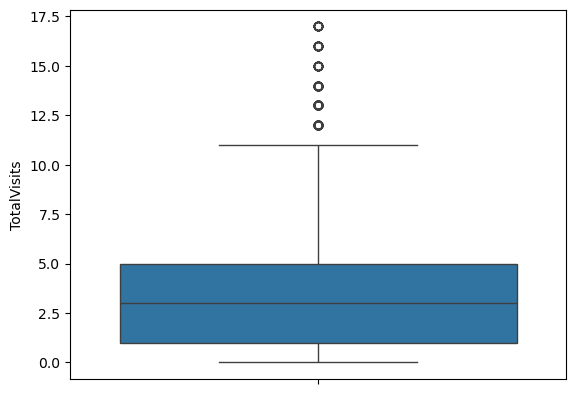

In [62]:
#Outlier Treatment: Remove top & bottom 1% of the Column Outlier values

Q3 = Lead_data.TotalVisits.quantile(0.99)
Lead_data = Lead_data[(Lead_data.TotalVisits <= Q3)]
Q1 = Lead_data.TotalVisits.quantile(0.01)
Lead_data = Lead_data[(Lead_data.TotalVisits >= Q1)]
sns.boxplot(y=Lead_data['TotalVisits'])
plt.show()

### Dummy Variables

In [64]:
#list of columns to be dropped
cols_to_drop=['Country','Tags']

Tags variable is generated by the sales team after the disscussion with student.
So this can be dropped

In [66]:
#dropping columns
Lead_data = Lead_data.drop(cols_to_drop,axis=1)
Lead_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8991 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    8991 non-null   object 
 1   Lead Source                                    8991 non-null   object 
 2   Do Not Email                                   8991 non-null   object 
 3   Do Not Call                                    8991 non-null   object 
 4   Converted                                      8991 non-null   int64  
 5   TotalVisits                                    8991 non-null   float64
 6   Total Time Spent on Website                    8991 non-null   int64  
 7   Page Views Per Visit                           8991 non-null   float64
 8   Last Activity                                  8991 non-null   object 
 9   Specialization                                 8991 non-n

In [67]:
#getting a list of categorical columns

cat_cols= Lead_data.select_dtypes(include=['object']).columns
cat_cols

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [68]:
# Create dummy variables using the 'get_dummies'
dummy = pd.get_dummies(Lead_data[['Lead Origin','Specialization' ,'Lead Source', 'Do Not Email', 'Last Activity', 'What is your current occupation','A free copy of Mastering The Interview', 'Last Notable Activity']], drop_first=True, dtype = 'uint8' )
# Add the results to the master dataframe
Lead_data_dum = pd.concat([Lead_data, dummy], axis=1)
Lead_data_dum

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,API,Olark Chat,No,No,0,0.0,0,0.00,Page Visited on Website,not provided,...,0,0,1,0,0,0,0,0,0,0
1,API,Organic Search,No,No,0,5.0,674,2.50,Email Opened,not provided,...,0,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,Email Opened,Business Administration,...,0,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,Unreachable,Media and Advertising,...,0,0,1,0,0,0,0,0,0,0
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,Converted to Lead,not provided,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,Email Marked Spam,IT Projects Management,...,0,0,0,0,0,0,0,0,0,0
9236,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,SMS Sent,Media and Advertising,...,0,0,0,0,0,0,1,0,0,0
9237,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,SMS Sent,Business Administration,...,0,0,0,0,0,0,1,0,0,0
9238,Landing Page Submission,Google,No,No,1,3.0,499,3.00,SMS Sent,Human Resource Management,...,0,0,0,0,0,0,1,0,0,0


In [69]:
Lead_data_dum = Lead_data_dum.drop(['City','What is your current occupation_not provided','Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call','Last Activity', 'Specialization', 'Specialization_not provided','What is your current occupation','What matters most to you in choosing a course', 'Search','Newspaper Article', 'X Education Forums', 'Newspaper','Digital Advertisement', 'Through Recommendations','A free copy of Mastering The Interview', 'Last Notable Activity'], axis = 1)
Lead_data_dum

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.00,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.50,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.00,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.00,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,2.0,1428,1.00,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,1,8.0,1845,2.67,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9236,0,2.0,238,2.00,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9237,0,2.0,199,2.00,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
9238,1,3.0,499,3.00,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


### Test-Train Split dataset

In [71]:
 #Import the required library
from sklearn.model_selection import train_test_split

In [72]:
X = Lead_data_dum.drop(['Converted'], axis = 1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0.0,0,0.0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [73]:
# Putting the target variable in y
y = Lead_data_dum['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [74]:
# Split the dataset into 70% and 30% for train and test dataset respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=10)

In [75]:
# Import MinMax scaler
from sklearn.preprocessing import MinMaxScaler
# Scale the three numeric features
scaler = MinMaxScaler()
X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3523,0.117647,0.057218,0.0625,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3267,0.000000,0.000000,0.0000,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5653,0.117647,0.404049,0.1250,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5072,0.000000,0.000000,0.0000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3704,0.235294,0.043134,0.2500,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Model Building : Logistic Model

In [77]:
# Import 'LogisticRegression'
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [78]:
# Import RFE
from sklearn.feature_selection import RFE

In [79]:
# Running RFE with 20 variables as output
rfe = RFE(lr, n_features_to_select=20)
rfe = rfe.fit(X_train, y_train)

In [80]:
# Features that have been selected by RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Lead Origin_Landing Page Submission', False, 21),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 43),
 ('Specialization_Business Administration', False, 23),
 ('Specialization_E-Business', False, 18),
 ('Specialization_E-COMMERCE', False, 27),
 ('Specialization_Finance Management', False, 20),
 ('Specialization_Healthcare Management', False, 19),
 ('Specialization_Hospitality Management', False, 48),
 ('Specialization_Human Resource Management', False, 22),
 ('Specialization_IT Projects Management', False, 25),
 ('Specialization_International Business', False, 26),
 ('Specialization_Marketing Management', False, 17),
 ('Specialization_Media and Advertising', False, 45),
 ('Specialization_Operations Management', False, 29),
 ('Specialization_Retail Management', False, 59),
 ('Specialization_Rural and Agribusiness', False, 28),
 ('Specialization_Servi

In [81]:
# Put all the columns selected by RFE in the variable 'col'
col = X_train.columns[rfe.support_]

All the variables selected by RFE, 
next let do statistics part (p-values and the VIFs)

In [83]:
# Selecting columns selected by RFE
X_train = X_train[col]

In [84]:
# Importing statsmodels
import statsmodels.api as sm

In [85]:
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6293
Model:                            GLM   Df Residuals:                     6272
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2574.8
Date:                Tue, 18 Feb 2025   Deviance:                       5149.5
Time:                        11:16:15   Pearson chi2:                 6.53e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3981
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.3993      0.101      3.949      0.000       0.201       0.598
TotalVisits                                              1.9397      0.300      6.462      0.000       1.351       2.528
Total Time Spent on Website                              4.6939      0.170     27.582      0.000       4.360       5.027
Page Views Per Visit                                    -2.0213      0.444     -4.558      0.000      -2.891      -1.152
Lead Origin_Lead Add Form                                3.0474      0.256     11.902      0.000       2.546       3.549
Lead Source_Direct Traffic                              -1.5381      0.132    -11.618      0.000      -1.798      -1.279
Lead Source_Google                                      -1.1086      0.129     -8.573      0.000      -1.362      -0.855
Lead Source_Organic Search                              -1.4319      0.165     -8.678      0.000      -1.755      -1.108
Lead Source_Referral Sites                              -1.3491      0.334     -4.043      0.000      -2.003      -0.695
Lead Source_Welingak Website                             2.4666      1.039      2.373      0.018       0.429       4.504
Do Not Email_Yes                                        -1.4317      0.206     -6.936      0.000      -1.836      -1.027
Last Activity_Email Bounced                             -1.1133      0.396     -2.813      0.005      -1.889      -0.338
Last Activity_Olark Chat Conversation                   -1.3015      0.193     -6.731      0.000      -1.680      -0.922
What is your current occupation_Housewife               22.3590   1.75e+04      0.001      0.999   -3.43e+04    3.43e+04
What is your current occupation_Other                    1.0698      0.756      1.415      0.157      -0.412       2.552
What is your current occupation_Working Professional     2.7816      0.191     14.535      0.000       2.407       3.157
Last Notable Activity_Email Link Clicked                -2.0752      0.266     -7.791      0.000      -2.597      -1.553
Last Notable Activity_Email Opened                      -1.4387      0.090    -16.000      0.000      -1.615      -1.262
Last Notable Activity_Modified                          -1.8582      0.099    -18.753      0.000      -2.052      -1.664
Last Notable Activity_Olark Chat Conversation           -1.6235      0.372     -4.360      0.000      -2.353      -0.894
Last Notable Activity_Page Visited on Website           -2.1400      0.216     -9.901      0.000      -2.564      -1.716
========================================================================================================================
"""

In [86]:
# Importing 'variance_inflation_factor'
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Page Views Per Visit,6.32
0,TotalVisits,5.50
5,Lead Source_Google,3.56
4,Lead Source_Direct Traffic,3.15
6,Lead Source_Organic Search,2.43
1,Total Time Spent on Website,2.35
17,Last Notable Activity_Modified,2.34
9,Do Not Email_Yes,1.92
10,Last Activity_Email Bounced,1.86
11,Last Activity_Olark Chat Conversation,1.77


- VIF for 'Page Views Per Visit' is more than 5

In [88]:
X_train.drop(['Page Views Per Visit'], axis = 1, inplace = True)

In [89]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6293
Model:                            GLM   Df Residuals:                     6273
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2585.3
Date:                Tue, 18 Feb 2025   Deviance:                       5170.6
Time:                        11:16:16   Pearson chi2:                 6.55e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3961
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.3610      0.101      3.592      0.000       0.164       0.558
TotalVisits                                              1.1717      0.249      4.706      0.000       0.684       1.660
Total Time Spent on Website                              4.6767      0.170     27.553      0.000       4.344       5.009
Lead Origin_Lead Add Form                                3.0621      0.256     11.959      0.000       2.560       3.564
Lead Source_Direct Traffic                              -1.7043      0.128    -13.349      0.000      -1.955      -1.454
Lead Source_Google                                      -1.2849      0.124    -10.379      0.000      -1.528      -1.042
Lead Source_Organic Search                              -1.6675      0.157    -10.621      0.000      -1.975      -1.360
Lead Source_Referral Sites                              -1.5513      0.333     -4.664      0.000      -2.203      -0.899
Lead Source_Welingak Website                             2.4664      1.040      2.372      0.018       0.429       4.504
Do Not Email_Yes                                        -1.4651      0.205     -7.142      0.000      -1.867      -1.063
Last Activity_Email Bounced                             -1.0273      0.394     -2.611      0.009      -1.799      -0.256
Last Activity_Olark Chat Conversation                   -1.2821      0.193     -6.633      0.000      -1.661      -0.903
What is your current occupation_Housewife               22.3256   1.74e+04      0.001      0.999   -3.42e+04    3.42e+04
What is your current occupation_Other                    1.1513      0.746      1.544      0.123      -0.310       2.613
What is your current occupation_Working Professional     2.7755      0.191     14.519      0.000       2.401       3.150
Last Notable Activity_Email Link Clicked                -2.0278      0.265     -7.665      0.000      -2.546      -1.509
Last Notable Activity_Email Opened                      -1.4110      0.089    -15.785      0.000      -1.586      -1.236
Last Notable Activity_Modified                          -1.8297      0.099    -18.548      0.000      -2.023      -1.636
Last Notable Activity_Olark Chat Conversation           -1.5390      0.368     -4.177      0.000      -2.261      -0.817
Last Notable Activity_Page Visited on Website           -1.9536      0.209     -9.326      0.000      -2.364      -1.543
========================================================================================================================
"""

In [90]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
0,TotalVisits,3.68
4,Lead Source_Google,3.09
3,Lead Source_Direct Traffic,2.77
1,Total Time Spent on Website,2.35
16,Last Notable Activity_Modified,2.34
5,Lead Source_Organic Search,2.10
8,Do Not Email_Yes,1.91
9,Last Activity_Email Bounced,1.85
10,Last Activity_Olark Chat Conversation,1.77
15,Last Notable Activity_Email Opened,1.70


- VIF in good shape now
- P value 0.999 for What is your current occupation_Housewife

In [92]:
X_train.drop(['What is your current occupation_Housewife'], axis = 1, inplace = True)

In [93]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6293
Model:                            GLM   Df Residuals:                     6274
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2588.6
Date:                Tue, 18 Feb 2025   Deviance:                       5177.2
Time:                        11:16:17   Pearson chi2:                 6.57e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3955
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.3588      0.100      3.571      0.000       0.162       0.556
TotalVisits                                              1.1635      0.249      4.675      0.000       0.676       1.651
Total Time Spent on Website                              4.6799      0.170     27.582      0.000       4.347       5.012
Lead Origin_Lead Add Form                                3.0879      0.256     12.078      0.000       2.587       3.589
Lead Source_Direct Traffic                              -1.7002      0.128    -13.328      0.000      -1.950      -1.450
Lead Source_Google                                      -1.2806      0.124    -10.351      0.000      -1.523      -1.038
Lead Source_Organic Search                              -1.6655      0.157    -10.612      0.000      -1.973      -1.358
Lead Source_Referral Sites                              -1.5500      0.333     -4.661      0.000      -2.202      -0.898
Lead Source_Welingak Website                             2.4403      1.040      2.348      0.019       0.403       4.478
Do Not Email_Yes                                        -1.4671      0.205     -7.149      0.000      -1.869      -1.065
Last Activity_Email Bounced                             -1.0273      0.393     -2.611      0.009      -1.799      -0.256
Last Activity_Olark Chat Conversation                   -1.2842      0.193     -6.645      0.000      -1.663      -0.905
What is your current occupation_Other                    1.1485      0.746      1.540      0.124      -0.313       2.610
What is your current occupation_Working Professional     2.7723      0.191     14.502      0.000       2.398       3.147
Last Notable Activity_Email Link Clicked                -2.0151      0.263     -7.669      0.000      -2.530      -1.500
Last Notable Activity_Email Opened                      -1.4079      0.089    -15.755      0.000      -1.583      -1.233
Last Notable Activity_Modified                          -1.8262      0.099    -18.522      0.000      -2.019      -1.633
Last Notable Activity_Olark Chat Conversation           -1.5355      0.368     -4.168      0.000      -2.258      -0.813
Last Notable Activity_Page Visited on Website           -1.9525      0.209     -9.320      0.000      -2.363      -1.542
========================================================================================================================
"""

In [94]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
0,TotalVisits,3.68
4,Lead Source_Google,3.09
3,Lead Source_Direct Traffic,2.77
1,Total Time Spent on Website,2.35
15,Last Notable Activity_Modified,2.34
5,Lead Source_Organic Search,2.10
8,Do Not Email_Yes,1.91
9,Last Activity_Email Bounced,1.85
10,Last Activity_Olark Chat Conversation,1.77
14,Last Notable Activity_Email Opened,1.70


- p value for "What is your current occupation_Other" is greater than 0.05

In [96]:
X_train.drop(['What is your current occupation_Other'], axis = 1, inplace = True)

In [97]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm4 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6293
Model:                            GLM   Df Residuals:                     6275
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2589.8
Date:                Tue, 18 Feb 2025   Deviance:                       5179.6
Time:                        11:16:17   Pearson chi2:                 6.56e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3953
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.3575      0.100      3.558      0.000       0.161       0.554
TotalVisits                                              1.1670      0.249      4.688      0.000       0.679       1.655
Total Time Spent on Website                              4.6833      0.170     27.604      0.000       4.351       5.016
Lead Origin_Lead Add Form                                3.0865      0.256     12.074      0.000       2.585       3.588
Lead Source_Direct Traffic                              -1.6995      0.128    -13.325      0.000      -1.949      -1.450
Lead Source_Google                                      -1.2811      0.124    -10.357      0.000      -1.523      -1.039
Lead Source_Organic Search                              -1.6653      0.157    -10.607      0.000      -1.973      -1.358
Lead Source_Referral Sites                              -1.5536      0.333     -4.672      0.000      -2.205      -0.902
Lead Source_Welingak Website                             2.4405      1.039      2.348      0.019       0.403       4.478
Do Not Email_Yes                                        -1.4683      0.205     -7.156      0.000      -1.871      -1.066
Last Activity_Email Bounced                             -1.0281      0.393     -2.613      0.009      -1.799      -0.257
Last Activity_Olark Chat Conversation                   -1.2808      0.193     -6.632      0.000      -1.659      -0.902
What is your current occupation_Working Professional     2.7694      0.191     14.489      0.000       2.395       3.144
Last Notable Activity_Email Link Clicked                -2.0150      0.263     -7.668      0.000      -2.530      -1.500
Last Notable Activity_Email Opened                      -1.4049      0.089    -15.727      0.000      -1.580      -1.230
Last Notable Activity_Modified                          -1.8221      0.099    -18.493      0.000      -2.015      -1.629
Last Notable Activity_Olark Chat Conversation           -1.5389      0.368     -4.177      0.000      -2.261      -0.817
Last Notable Activity_Page Visited on Website           -1.9535      0.210     -9.324      0.000      -2.364      -1.543
========================================================================================================================
"""

In [98]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
0,TotalVisits,3.68
4,Lead Source_Google,3.09
3,Lead Source_Direct Traffic,2.77
1,Total Time Spent on Website,2.34
14,Last Notable Activity_Modified,2.34
5,Lead Source_Organic Search,2.10
8,Do Not Email_Yes,1.91
9,Last Activity_Email Bounced,1.85
10,Last Activity_Olark Chat Conversation,1.77
13,Last Notable Activity_Email Opened,1.70


All the VIF values are good and all the p-values are below 0.05. So we can now go ahead with our model.
### Creating Prediction

In [100]:
# Predicting the probabilities on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3523    0.257438
3267    0.997225
5653    0.327989
5072    0.259734
3704    0.135660
1790    0.116880
2482    0.180653
1694    0.187767
8768    0.119395
9225    0.004629
dtype: float64

In [101]:
# Reshaping to an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.25743824, 0.99722548, 0.32798883, 0.2597343 , 0.1356595 ,
       0.11687958, 0.18065264, 0.1877671 , 0.11939502, 0.00462932])

In [102]:
# Data frame with given convertion rate and probablity of predicted ones
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,0,0.257438
1,1,0.997225
2,1,0.327989
3,0,0.259734
4,0,0.135660


In [103]:
# Substituting 0 or 1 with the cut off as 0.5
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,0,0.257438,0
1,1,0.997225,1
2,1,0.327989,0
3,0,0.259734,0
4,0,0.135660,0


### Model Evaluation

In [105]:
# Importing metrics from sklearn for evaluation
from sklearn import metrics
# Creating confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3479,  436],
       [ 708, 1670]], dtype=int64)

In [106]:
# Predicted        No         Yes
# Actual
# No              3479      436
# Yes             708      1670

In [107]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.8182107103130463

That's around 82% accuracy with is a very good value

In [109]:
# Substituting the value of true positive
TP = confusion[1,1]
# Substituting the value of true negatives
TN = confusion[0,0]
# Substituting the value of false positives
FP = confusion[0,1] 
# Substituting the value of false negatives
FN = confusion[1,0]


# Calculating the sensitivity
TP/(TP+FN)

0.7022708158116064

In [110]:
# Calculating the specificity
TN/(TN+FP)

0.8886334610472542

With the cut off value as 0.5 we have around 82% accuracy, sensitivity of around 70% and specificity of around 89%.

### Optimise Cut off (ROC Curve)
The previous cut off was randomely selected. Now to find the optimum one

In [112]:
# ROC function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [113]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

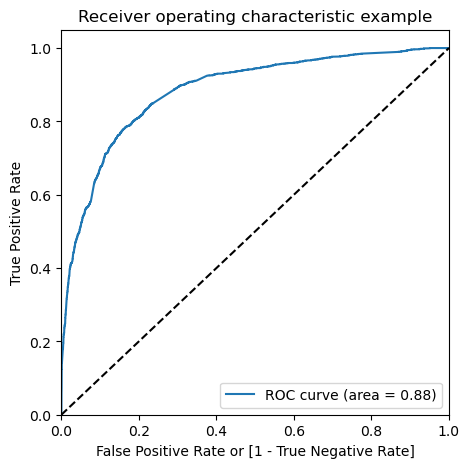

In [114]:
# Call the ROC function
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

The area under ROC curve is 0.88 which is a very good value

In [116]:
# Creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.257438,0,1,1,1,0,0,0,0,0,0,0
1,1,0.997225,1,1,1,1,1,1,1,1,1,1,1
2,1,0.327989,0,1,1,1,1,0,0,0,0,0,0
3,0,0.259734,0,1,1,1,0,0,0,0,0,0,0
4,0,0.135660,0,1,1,0,0,0,0,0,0,0,0


In [117]:
# Creating a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
# Making confusing matrix to find values of sensitivity, accurace and specificity for each level of probablity
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

,prob,accuracy,sensi,speci
0.0,0.0,0.377880,1.000000,0.000000
0.1,0.1,0.605911,0.961312,0.390038
0.2,0.2,0.757508,0.907906,0.666156
0.3,0.3,0.801367,0.829689,0.784163
0.4,0.4,0.817257,0.770395,0.845722
0.5,0.5,0.818211,0.702271,0.888633
0.6,0.6,0.794057,0.573591,0.927969
0.7,0.7,0.782616,0.501682,0.953257
0.8,0.8,0.763547,0.421362,0.971392
0.9,0.9,0.717623,0.269975,0.989527


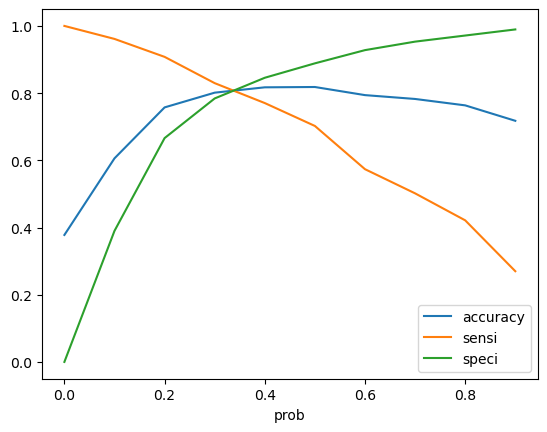

In [118]:
# Plotting it
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

From the graph it is visible that the optimal cut off is at 0.35.

In [120]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.35 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.257438,0,1,1,1,0,0,0,0,0,0,0,0
1,1,0.997225,1,1,1,1,1,1,1,1,1,1,1,1
2,1,0.327989,0,1,1,1,1,0,0,0,0,0,0,0
3,0,0.259734,0,1,1,1,0,0,0,0,0,0,0,0
4,0,0.135660,0,1,1,0,0,0,0,0,0,0,0,0


In [121]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8091530271730494

In [122]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3191,  724],
       [ 477, 1901]], dtype=int64)

In [123]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]


# Calculating the sensitivity
TP/(TP+FN)

0.7994112699747687

In [124]:
# Calculating the specificity
TN/(TN+FP)

0.8150702426564496

With the current cut off as 0.35 we have accuracy(81%), sensitivity(80%) and specificity(81%) i.e. all around 80%

### Prediction on Test set

In [126]:
 #Scaling numeric values
X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [127]:
col = X_train.columns

In [128]:
# Select the columns in X_train for X_test as well
X_test = X_test[col]
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test[col])
X_test_sm
X_test_sm

,const,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Organic Search,Lead Source_Referral Sites,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Email Bounced,Last Activity_Olark Chat Conversation,What is your current occupation_Working Professional,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website
3308,1.0,0.117647,0.050176,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
4421,1.0,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8855,1.0,0.058824,0.547975,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
5302,1.0,0.000000,0.000000,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
2169,1.0,0.588235,0.390405,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5655,1.0,0.058824,0.218310,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
7836,1.0,0.588235,0.227113,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0
8378,1.0,0.588235,0.179577,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1
1263,1.0,0.117647,0.376320,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0


In [129]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.123887
1,1,0.588440
2,1,0.370721
3,0,0.060348
4,0,0.442248


In [130]:
# Making prediction using cut off 0.35
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.35 else 0)
y_pred_final

,Converted,Conversion_Prob,final_predicted
0,0,0.123887,0
1,1,0.588440,1
2,1,0.370721,1
3,0,0.060348,0
4,0,0.442248,1
...,...,...,...
2693,1,0.111744,0
2694,1,0.829332,1
2695,0,0.039085,0
2696,1,0.965347,1


In [131]:
# Check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.8002223869532987

In [132]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1350,  327],
       [ 212,  809]], dtype=int64)

In [133]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]


# Calculating the sensitivity
TP/(TP+FN)

0.7923604309500489

In [134]:
# Calculating the specificity
TN/(TN+FP)

0.8050089445438283

With the current cut off as 0.35 we have accuracy, sensitivity and specificity of around 80%

### Precision-Recall

In [136]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3479,  436],
       [ 708, 1670]], dtype=int64)

In [137]:
# Precision = TP / TP + FP
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7929724596391263

In [138]:
#Recall = TP / TP + FN
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.7022708158116064

With the current cut off as 0.35 we have Precision around 79% and Recall around 70%

### Precision and recall tradeoff

In [140]:
from sklearn.metrics import precision_recall_curve
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       0
 1       1
 2       1
 3       0
 4       0
        ..
 6288    1
 6289    1
 6290    1
 6291    0
 6292    1
 Name: Converted, Length: 6293, dtype: int64,
 0       0
 1       1
 2       0
 3       0
 4       0
        ..
 6288    1
 6289    0
 6290    1
 6291    0
 6292    1
 Name: Predicted, Length: 6293, dtype: int64)

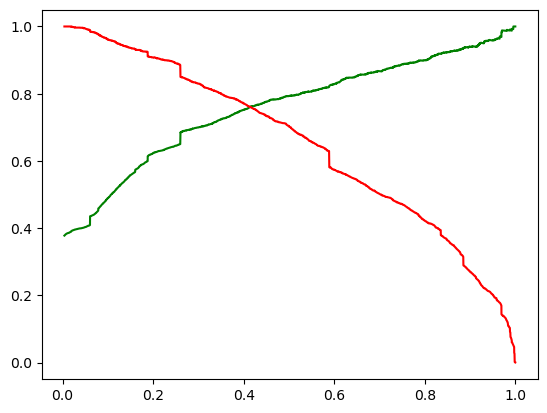

In [141]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

Optimal cutoff post precision recall tradeoff is 0.41.

Selcting 0.41 as optimized cutoff point based on precision-recall tradeoff

In [143]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.41 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.257438,0,1,1,1,0,0,0,0,0,0,0,0
1,1,0.997225,1,1,1,1,1,1,1,1,1,1,1,1
2,1,0.327989,0,1,1,1,1,0,0,0,0,0,0,0
3,0,0.259734,0,1,1,1,0,0,0,0,0,0,0,0
4,0,0.135660,0,1,1,0,0,0,0,0,0,0,0,0


In [144]:
# Accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8180518035912919

In [145]:
# Creating confusion matrix again
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3333,  582],
       [ 563, 1815]], dtype=int64)

In [146]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]
# Precision = TP / TP + FP
TP / (TP + FP)

0.7571964956195244

In [147]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.763246425567704

With the current cut off as 0.44 we have Precision around 76% and Recall around 76.3% and accuracy 82 %.

### Prediction on Test set

In [149]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.123887
1,1,0.588440
2,1,0.370721
3,0,0.060348
4,0,0.442248


In [150]:
# Making prediction using cut off 0.41
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.44 else 0)
y_pred_final

,Converted,Conversion_Prob,final_predicted
0,0,0.123887,0
1,1,0.588440,1
2,1,0.370721,0
3,0,0.060348,0
4,0,0.442248,1
...,...,...,...
2693,1,0.111744,0
2694,1,0.829332,1
2695,0,0.039085,0
2696,1,0.965347,1


In [151]:
y_pred_final["Lead Score"] = (y_pred_final["Conversion_Prob"] * 100).astype(int)

In [152]:
y_pred_final.head()

,Converted,Conversion_Prob,final_predicted,Lead Score
0,0,0.123887,0,12
1,1,0.588440,1,58
2,1,0.370721,0,37
3,0,0.060348,0,6
4,0,0.442248,1,44


### Check the overall accuracy

In [154]:
# Check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.8057820607857672

In [155]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1426,  251],
       [ 273,  748]], dtype=int64)

In [156]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]


# Precision = TP / TP + FP
TP / (TP + FP)


0.7487487487487487

In [157]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.732615083251714

With the current cut off as 0.41 we have Precision around 75% , Recall around 73% and accuracy 80.5%.

The model demonstrates strong accuracy in predicting the conversion rate, which should provide the CEO with confidence in making informed decisions based on its outcomes.

In [159]:
col
print(res.params.sort_values(ascending=False).head(5))

Total Time Spent on Website                             4.683294
Lead Origin_Lead Add Form                               3.086496
What is your current occupation_Working Professional    2.769383
Lead Source_Welingak Website                            2.440484
TotalVisits                                             1.166951
dtype: float64


### Conclusion
It was determined that the most significant variables in identifying potential leads are:

Top positively impacts -
- The total time spend on the Website.
- Lead Origin_Lead Add Form
- What is your current occupation_Working Professional
- Lead Source_Welingak Website
- TotalVisits

With these strategies in place, X Education is poised for success, as they stand an excellent chance of persuading nearly all potential customers to opt for their courses.
